## NN Adv Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

### 기존 Baseline Model 성능

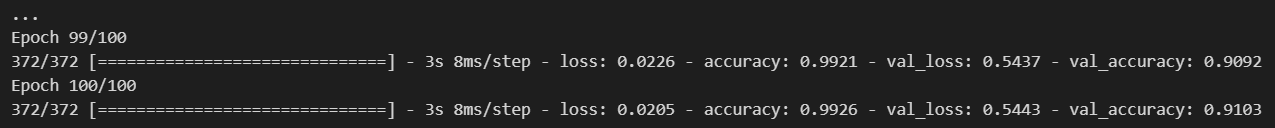

## 기존 Baseline Model보다 좋은 성능의 Neural Network를 만들어 보자!

### Load Data

Fashion MNIST 데이터셋은 [T-Shirts, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot]와 같이 10가지의 카테고리로 이루어져 있습니다.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
train['label'].nunique()

10

In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


이 부분에서 test에 왜 label이 없는지 이해가 되지 않아 kaggle에서 test 데이터 셋만 따로 사용했습니다.

In [3]:
test = pd.read_csv('fashion-mnist_test.csv')

In [41]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_test = test.iloc[:,1:].values
y_test = test.iloc[:,0].values

In [38]:
print(len(train))
print(len(test))

59500
10000



한 장의 이미지는 28x28(784) 픽셀의 이미지로 이루어져 있으며, train 데이터로 59,500장, test 데이터로 10,000장으로 나뉘어 있습니다.

In [5]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

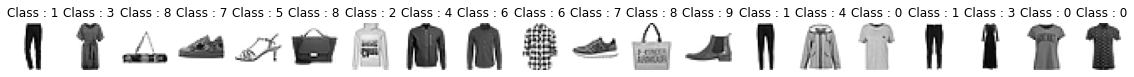

In [6]:
pltsize = 1
# 1x20의 틀을 만들고
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  # subplot 20개의 그래프 그리기
  plt.subplot(1, 20, idx + 1)
  # x,y축 범위 지정
  plt.axis('off')
  # 한 행 784개의 열을 28x28로 변환, 각 칸을 색칠한다.
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

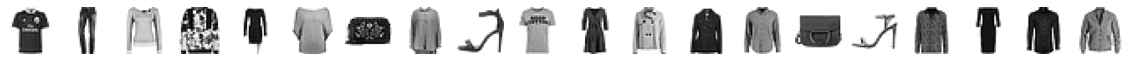

In [7]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### 데이터프레임 넘파이 바꾸기
X를 넘파이 행렬로 바꾸고 label의 데이터가 담긴 y는 원-핫 인코딩을 진행해 준다.

In [7]:
X = np.array(X)
y = pd.get_dummies(np.array(y))

In [8]:
X_test = np.array(X_test)
y_test = pd.get_dummies(np.array(y_test))

### Train-Validation Split

In [9]:
# 8:2의 비율로 train과 검증 데이터를 나눈다.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 12, stratify = y, shuffle = True)

In [10]:
# train and validate sets
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# normalisation
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [57]:
print("X_train shape:", X_train.shape)
print("X_validate shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_validate shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (47600, 28, 28, 1)
X_validate shape: (11900, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (47600, 10)
y_validate shape: (11900, 10)
y_test shape: (10000, 10)


### CNN모델 - LeNet5

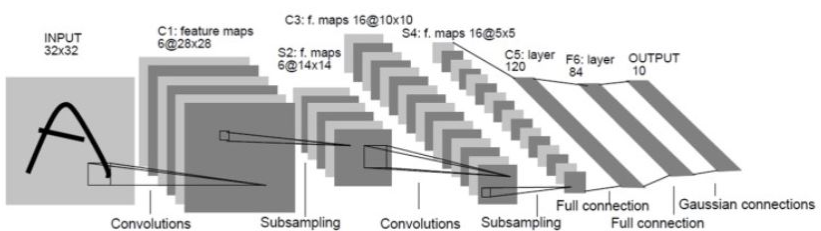
인풋(Input) 레이어, 3개의 컨볼루션 레이어(C1, C3, C5), 2개의 서브샘플링 레이어(Subsampling layer or Pooling layer)(S2, S4), 1층의 full-connected 레이어(F6), 아웃풋(Output) 레이어로 구성되어 있다. 참고로 C1부터 F6까지 활성화 함수로 tanh(hypobolic tangent)을 사용한다.

In [11]:
import keras 
from keras.models import Sequential # sequential model
from keras.layers import Dropout, Flatten, AveragePooling2D
from keras.layers import Dense,Conv2D  # 레이어 종류
from keras.layers import BatchNormalization

In [12]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(16, kernel_size=5, activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(120, activation='relu'))

model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation = 'softmax'))

In [13]:
optimizer = 'adam'
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [15]:
result = model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data = (X_val, y_val), verbose=0)

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)

In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.40301814675331116
Test accuracy: 0.8510000109672546


좀 더 성능 향상을 하기 위해 dropout을 적용해 보기로 했다.

In [18]:
num_classes = 10

model = Sequential()

model.add(Conv2D(6, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(16, kernel_size=5, activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(84, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(num_classes, activation = 'softmax'))

In [19]:
optimizer = 'adam'
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [20]:
result = model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data = (X_val, y_val), verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)

In [21]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4433102011680603
Test accuracy: 0.8360999822616577


오히려 드롭아웃을 적용했을 때 감소 했는데 기존 데이터 셋과 달라서 생겼을 문제도 있고 확실하진 않지만 좀 더 공부해보겠습니다.....